# Data Visualization

## Pre-requisite

Make sure you already have the following dataset inside of your path:
- 'data/laei_2016_lts_rd_gla.csv'
- 'data/gla_tree_map_2018.csv'
- 'data/diseases.csv'
- 'data/geo-data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'

In [1]:
pip install pandas

You should consider upgrading via the '/mnt/c/Users/irvif/dev/data-visualization/.env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyxlsb

You should consider upgrading via the '/mnt/c/Users/irvif/dev/data-visualization/.env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [291]:
pip install numpy

You should consider upgrading via the '/mnt/c/Users/irvif/dev/data-visualization/.env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install matplotlib

     |████████████████████████████████| 11.3 MB 3.7 MB/s            
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 895 kB 23.4 MB/s            
     |████████████████████████████████| 4.3 MB 17.8 MB/s            
  Using cached kiwisolver-1.3.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
You should consider upgrading via the '/mnt/c/Users/irvif/dev/data-visualization/.env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [511]:
pip install geopandas

You should consider upgrading via the '/mnt/c/Users/irvif/dev/data-visualization/.env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from data_visualization_utility import *

## Getting GIS for Greater London Area(GLA)

We're using GIS provided inside of this [website](https://data.london.gov.uk/dataset/long-term-health-impacts-of-air-pollution)

In [2]:
map_file_path = "data/geo-data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(map_file_path)
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


<AxesSubplot:>

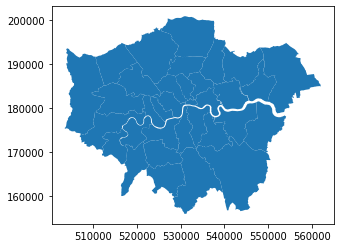

In [3]:
map_df.plot()

## Creating Data Visualization

### Getting Information Regarding Air Pollution in GLA


In [4]:
df_sheet_laei_2016_lts_rd_gla_copy = pd.read_csv("data/laei_2016_lts_rd_gla.csv")

In [7]:
df_sheet_laei_2016_lts_rd_gla_copy.head()

,GridId,Toid,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,DoT ID,Length (m),Emissions,Year,Pollutant,...,Diesel Car,Electric Car,Petrol LGV,Diesel LGV,Electric LGV,TfL Bus,Coach,Rigid HGV,Artic HGV,Total
0,6447,4000000027865921,526,Outer,Enfield,27883,233.431466,DFT,2016,CO2,...,571.381133,0.0,6.864563,212.556255,0.0,0.0,38.417863,274.010807,869.410394,2422.443915
1,6449,4000000027865921,528,Outer,Enfield,27883,556.683238,DFT,2016,CO2,...,1362.619638,0.0,16.370489,506.900403,0.0,0.0,91.618240,653.456134,2073.354555,5777.001472
2,6448,4000000027865921,1222,Outer,Enfield,27883,514.969431,DFT,2016,CO2,...,1260.514797,0.0,15.143803,468.916961,0.0,0.0,84.753034,604.490867,1917.992391,5344.114850
3,6621,4000000027865921,1893,Outer,Enfield,27883,13.845766,DFT,2016,CO2,...,33.890930,0.0,0.407165,12.607573,0.0,0.0,2.278719,16.252691,51.568253,143.684962
4,6622,4000000027865921,2583,Outer,Enfield,27883,133.474744,DFT,2016,CO2,...,326.712382,0.0,3.925117,121.538420,0.0,0.0,21.967109,156.677773,497.123765,1385.139227


In [8]:
df_sheet_laei_2016_lts_rd_gla_copy["pollutant"].unique()

KeyError: 'pollutant'

In [ ]:
df_sheet_laei_2016_lts_rd_gla_copy["toid"].unique()

In [69]:
# High pollutant in each of borough based on available street information
summarized_parameters = [
    "length",
    "motorcycle",
    "taxi",
    "petrol_car",
    "diesel_car",
    "electric_car",
    "petrol_lgv",
    "diesel_lgv",
    "electric_lgv",
    "total",
]
summary_of_pollutant_per_borough = df_sheet_laei_2016_lts_rd_gla_copy.groupby(
    by=["borough", "pollutant", "year", "toid"], as_index=False
)[summarized_parameters].sum()

In [302]:
summary_of_pollutant_per_borough.head()

,borough,pollutant,year,toid,length,motorcycle,taxi,petrol_car,diesel_car,electric_car,petrol_lgv,diesel_lgv,electric_lgv,total
0,Barking and Dagenham,CO2,2016,4000000030076500,220.100486,7.592021,9.196101,324.907785,194.539275,0.0,1.492897,116.549879,0.0,726.789077
1,Barking and Dagenham,CO2,2016,4000000030082641,362.578730,20.316954,21.413225,662.046438,389.509927,0.0,3.562255,309.867444,0.0,2394.928459
2,Barking and Dagenham,CO2,2016,4000000030082642,362.646021,20.971796,21.698211,690.146189,413.535733,0.0,3.753825,313.599333,0.0,2520.273193
3,Barking and Dagenham,CO2,2016,4000000030082838,112.860042,3.273125,6.275125,223.007497,134.146868,0.0,1.473551,113.660418,0.0,785.229639
4,Barking and Dagenham,CO2,2016,4000000030082839,112.152520,3.358130,6.219181,231.785896,142.037577,0.0,1.550103,115.815228,0.0,817.444758


In [451]:
unique_borough = summary_of_pollutant_per_borough["borough"].unique()
unique_borough

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City', 'City of Westminster', 'Croydon', 'Ealing',
       'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham',
       'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow',
       'Islington', 'Kensington and Chelsea', 'Kingston', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond',
       'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest',
       'Wandsworth'], dtype=object)

In [452]:
summary_of_pollutant_per_borough = summary_of_pollutant_per_borough.replace(
    {"borough": {"City": "City of London"}}
)

In [5]:
from pylab import *
import numpy as np

pollutants = list(summary_of_pollutant_per_borough["pollutant"].unique())
subplots_adjust(hspace=0.000)
number_of_subplots = len(pollutants)
fig, ax = plt.subplots(number_of_subplots, 1, figsize=(50, 25))
fig.tight_layout()
for i in range(number_of_subplots):
    x, y = generate_plot_based_on_pollutant(
        ax1, summary_of_pollutant_per_borough, pollutants[i]
    )
    ax[i].set_title(
        "{pollutant}'s emission.".format(pollutant=pollutants[i]), loc="left"
    )
    ax[i].plot(x.borough, y.total)

NameError: name 'summary_of_pollutant_per_borough' is not defined

In [6]:
pollutant = "NOx"
sm_nox = get_summary_based_on_pollutant(summary_of_pollutant_per_borough, pollutant)
sm_nox.head()

NameError: name 'summary_of_pollutant_per_borough' is not defined

In [465]:
join_column = "borough"
merged = merge_df_with_gis_data(map_df, sm_nox, join_column)
merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,year,toid,length,motorcycle,taxi,petrol_car,diesel_car,electric_car,petrol_lgv,diesel_lgv,electric_lgv,total
NAME,,,,,,,,,,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,0,0,"POLYGON ((516401.600 160201.800, 516407.300 16...",0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Croydon,E09000008,8649.441,0.000,F,0,0,"POLYGON ((535009.200 159504.700, 535005.500 15...",2016.0,6.324000e+18,92465.976572,1.293224,5.904002,39.547516,131.652174,0.0,0.472085,73.102951,0.0,415.965719
Bromley,E09000006,15013.487,0.000,F,0,0,"POLYGON ((540373.600 157530.400, 540361.200 15...",2016.0,6.124000e+18,113851.162321,1.668926,6.647256,47.620574,152.374263,0.0,0.611455,88.518562,0.0,432.858677
Hounslow,E09000018,5658.541,60.755,F,0,0,"POLYGON ((521975.800 178100.000, 521967.700 17...",2016.0,6.920000e+18,89405.054654,3.523178,41.055891,68.857556,218.697486,0.0,0.840923,120.194691,0.0,668.346725
Ealing,E09000009,5554.428,0.000,F,0,0,"POLYGON ((510253.500 182881.600, 510249.900 18...",2016.0,4.816000e+18,64873.372563,2.469186,21.932127,51.195221,163.735922,0.0,0.735636,104.560326,0.0,600.375867


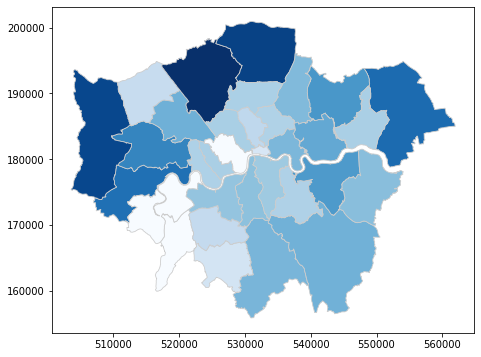

In [466]:
generate_heat_map(merged, "total")

## Visualizing the Impact of Air Pollution to Human's Health

We would like to see the relationship betwen air pollution and health in the Greater London Area (GLA) as it was mentioned inside of
this [report](https://www.london.gov.uk/what-we-do/environment/pollution-and-air-quality/health-and-exposure-pollution).

In general there are two pollutants of concern:
- Particulate Matter (PM 2.5)
- Nitrogen Dioxide (NO2)

IN the current implementation we only take a look into NOx (NO2).

In [509]:
diseases_data_prediction_input_file_path = "data/diseases.csv"
diseases_data_prediction = get_diseases_data_prediction(
    diseases_data_prediction_input_file_path
)
diseases_data_prediction.head()

,year,disease,age_group,incidence,above_threshold,borough
0,2016,childhood asthma,0-5,122,1,Barking
1,2016,childhood asthma,06-17,98,1,Barking
2,2016,childhood asthma,18-64,0,0,Barking
3,2016,childhood asthma,65+,0,0,Barking
4,2016,adult asthma,0-5,0,0,Barking


In [488]:
def get_diseases_insight_based_on_filter(diseases_data_prediction, filters):
    sm = diseases_data_prediction.groupby(filters, as_index=False).sum()
    return sm

In [489]:
diseases_summary = get_diseases_insight_based_on_filter(
    diseases_data_prediction, ["borough", "disease", "year", "above_threshold"]
)
diseases_summary.head()

,borough,disease,year,above_threshold,incidence
0,Barking,adult asthma,2016,0,17
1,Barking,adult asthma,2016,1,114
2,Barking,adult asthma,2017,0,16
3,Barking,adult asthma,2017,1,114
4,Barking,adult asthma,2018,0,16


In [490]:
diseases_summary_with_low_pollutant = diseases_summary[
    diseases_summary["above_threshold"] == 0
]
diseases_summary_with_low_pollutant = diseases_summary_with_low_pollutant.drop(
    ["above_threshold"], axis=1
)
diseases_summary_with_low_pollutant.head()

,borough,disease,year,incidence
0,Barking,adult asthma,2016,17
2,Barking,adult asthma,2017,16
4,Barking,adult asthma,2018,16
6,Barking,childhood asthma,2016,0
8,Barking,childhood asthma,2017,0


In [491]:
diseases_summary_with_high_pollutant = diseases_summary[
    diseases_summary["above_threshold"] == 1
]
diseases_summary_with_high_pollutant = diseases_summary_with_high_pollutant.drop(
    ["above_threshold"], axis=1
)
diseases_summary_with_high_pollutant.head()

,borough,disease,year,incidence
1,Barking,adult asthma,2016,114
3,Barking,adult asthma,2017,114
5,Barking,adult asthma,2018,113
7,Barking,childhood asthma,2016,220
9,Barking,childhood asthma,2017,219


<Figure size 1800x720 with 0 Axes>

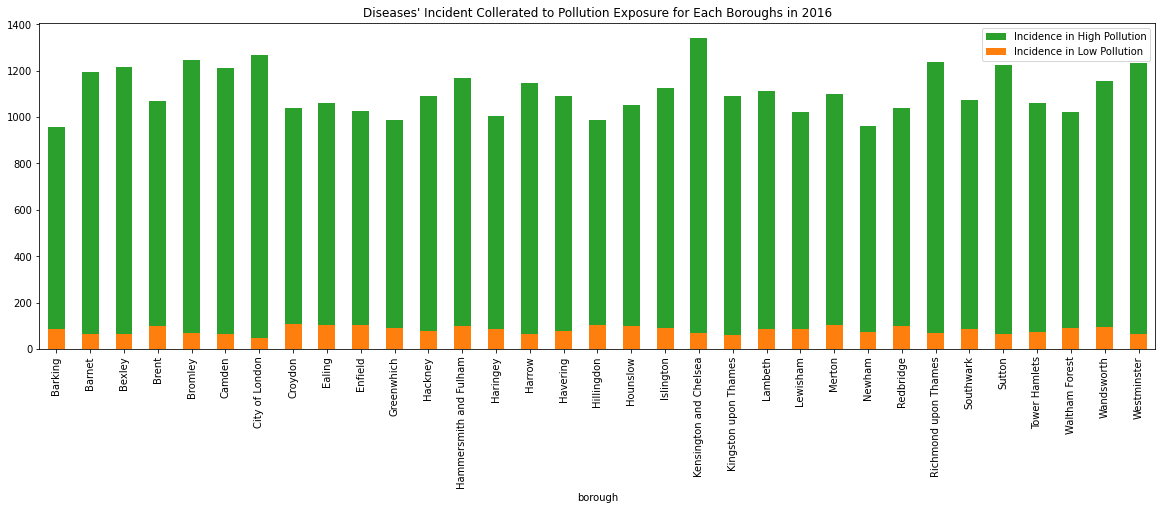

In [492]:
# Those with higher exposure will have larger incidence
create_plot_on_year(
    diseases_summary_with_high_pollutant, diseases_summary_with_low_pollutant, 2016
)

<Figure size 1800x720 with 0 Axes>

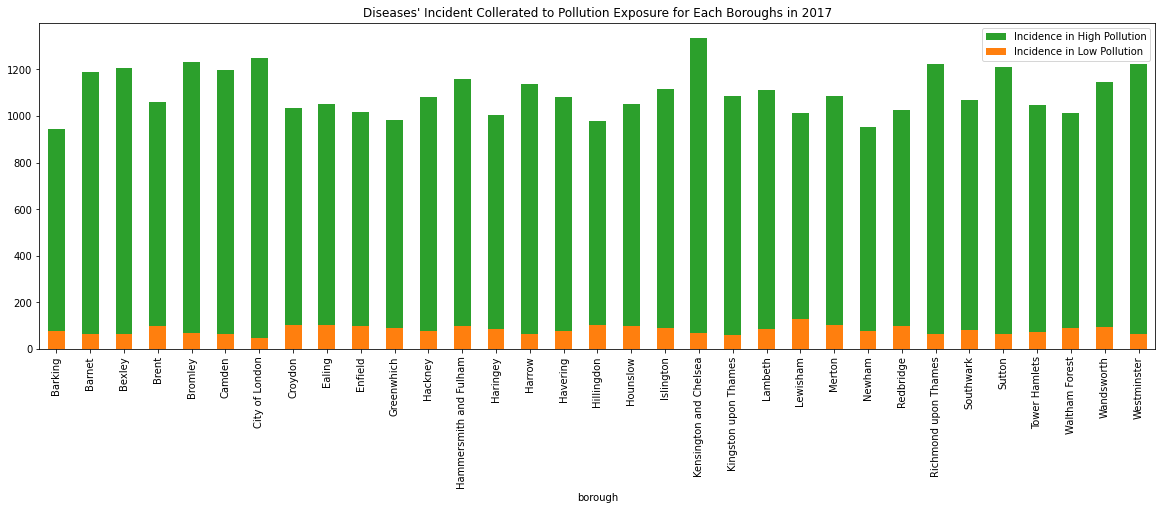

In [493]:
create_plot_on_year(
    diseases_summary_with_high_pollutant, diseases_summary_with_low_pollutant, 2017
)

<Figure size 1800x720 with 0 Axes>

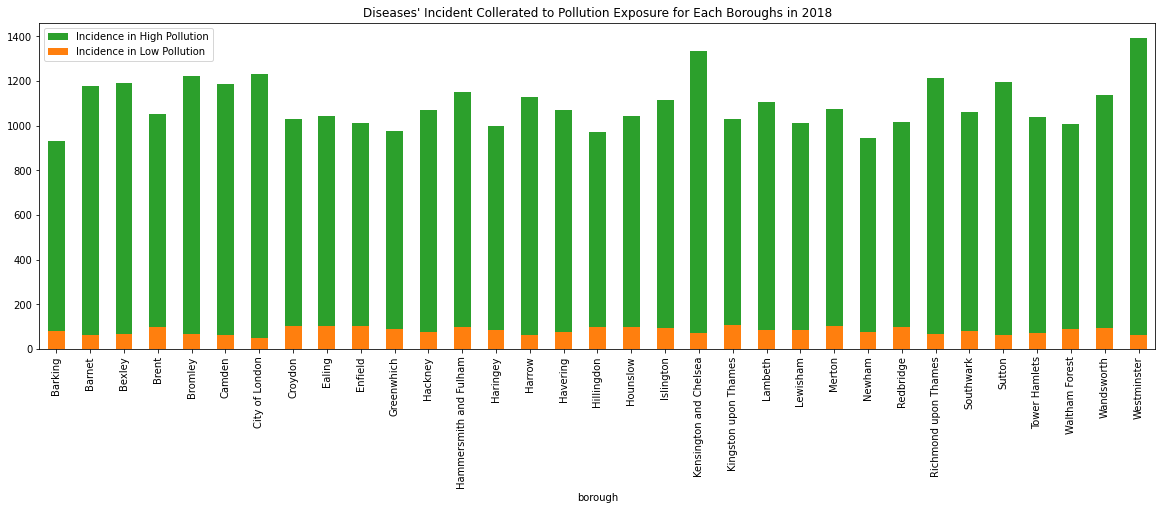

In [494]:
create_plot_on_year(
    diseases_summary_with_high_pollutant, diseases_summary_with_low_pollutant, 2018
)

## Visualizing Heatmap of Green Spaces in GLA

In [313]:
df_sheet_gla_tree_map_2018 = pd.read_csv("data/gla_tree_map_2018.csv")
df_sheet_gla_tree_map_2018.head()

,borough,load_date,longitude,latitude
0,Barking,20180214,0.139454,51.585695
1,Barking,20180214,0.139123,51.585670
2,Barking,20180214,0.139004,51.585689
3,Barking,20180214,0.139134,51.585732
4,Barking,20180214,0.139288,51.585819


In [319]:
def count_trees_for_each_borough(df):
    trees_count = df.groupby(["borough", "load_date"], as_index=False).value_counts()
    trees_count = trees_count[["borough", "count"]]
    trees_count = trees_count.groupby(["borough"], as_index=False).count()
    trees_count.head()
    return trees_count

In [320]:
tree_count = count_trees_for_each_borough(df_sheet_gla_tree_map_2018)
tree_count.head()

,borough,count
0,Barking,16328
1,Barnet,39377
2,Bexley,11237
3,Bromley,68063
4,Camden,21592


In [321]:
join_column = "borough"
tree_map = merge_df_with_gis_data(map_df, tree_count, join_column)
tree_map.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,count
NAME,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,0,0,"POLYGON ((516401.600 160201.800, 516407.300 16...",0.0
Croydon,E09000008,8649.441,0.000,F,0,0,"POLYGON ((535009.200 159504.700, 535005.500 15...",0.0
Bromley,E09000006,15013.487,0.000,F,0,0,"POLYGON ((540373.600 157530.400, 540361.200 15...",68063.0
Hounslow,E09000018,5658.541,60.755,F,0,0,"POLYGON ((521975.800 178100.000, 521967.700 17...",32469.0
Ealing,E09000009,5554.428,0.000,F,0,0,"POLYGON ((510253.500 182881.600, 510249.900 18...",40753.0


In [322]:
tree_map = tree_map.fillna(0)
tree_map.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,count
NAME,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,0,0,"POLYGON ((516401.600 160201.800, 516407.300 16...",0.0
Croydon,E09000008,8649.441,0.000,F,0,0,"POLYGON ((535009.200 159504.700, 535005.500 15...",0.0
Bromley,E09000006,15013.487,0.000,F,0,0,"POLYGON ((540373.600 157530.400, 540361.200 15...",68063.0
Hounslow,E09000018,5658.541,60.755,F,0,0,"POLYGON ((521975.800 178100.000, 521967.700 17...",32469.0
Ealing,E09000009,5554.428,0.000,F,0,0,"POLYGON ((510253.500 182881.600, 510249.900 18...",40753.0


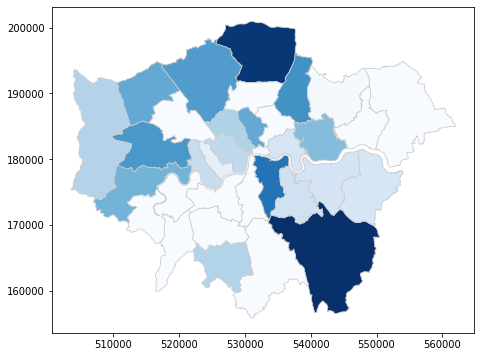

In [481]:
generate_heat_map(tree_map, "count")